In [18]:
#installing kaggle library
! pip install kaggle

Defaulting to user installation because normal site-packages is not writeable
  Using cached kaggle-1.5.16.tar.gz (83 kB)
  Preparing metadata (setup.py) ... done
  Using cached python_slugify-8.0.1-py2.py3-none-any.whl (9.7 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.2 MB/s eta 0:00:00
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.8/162.8 kB 3.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 6.2 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110702 sha256=3263cad243f4891dd28ea995365ca456e10e7a5197bfc29d77d8cc198a26fb10
  Stored in directory: /home/shreesh/.cache/pip/wheels/43/4b/fb/736478af5e8004810081a06259f9aa2f7c3329fc5d03c2c412
Successfully built kaggle


In [6]:
#creating the .kaggle folder in the root directory
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/home/shreesh/.kaggle’: File exists


In [2]:
! cp kaggle.json ~/.kaggle/

In [3]:
# set permissions
! chmod 600 ~/.kaggle/kaggle.json

In [18]:
! kaggle datasets download tawsifurrahman/covid19-radiography-database

100%|███████████████████████████████████████▉| 776M/778M [00:51<00:00, 16.2MB/s]
100%|████████████████████████████████████████| 778M/778M [00:51<00:00, 15.7MB/s]


In [19]:
! unzip covid19-radiography-database.zip

Archive:  covid19-radiography-database.zip
  inflating: COVID-19_Radiography_Dataset/COVID.metadata.xlsx  
  inflating: COVID-19_Radiography_Dataset/COVID/images/COVID-1.png  
  inflating: COVID-19_Radiography_Dataset/COVID/images/COVID-10.png  
  inflating: COVID-19_Radiography_Dataset/COVID/images/COVID-100.png  
  inflating: COVID-19_Radiography_Dataset/COVID/images/COVID-1000.png  
  inflating: COVID-19_Radiography_Dataset/COVID/images/COVID-1001.png  
  inflating: COVID-19_Radiography_Dataset/COVID/images/COVID-1002.png  
  inflating: COVID-19_Radiography_Dataset/COVID/images/COVID-1003.png  
  inflating: COVID-19_Radiography_Dataset/COVID/images/COVID-1004.png  
  inflating: COVID-19_Radiography_Dataset/COVID/images/COVID-1005.png  
  inflating: COVID-19_Radiography_Dataset/COVID/images/COVID-1006.png  
  inflating: COVID-19_Radiography_Dataset/COVID/images/COVID-1007.png  
  inflating: COVID-19_Radiography_Dataset/COVID/images/COVID-1008.png  
  inflating: COVID-19_Radiography_D

In [7]:
! pip install split-folders

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import os
import shutil
import random

original_path = "./COVID-19_Radiography_Dataset"
new_path = "./COVID"

os.makedirs(new_path, exist_ok=True);
os.makedirs(new_path + "/train", exist_ok=True)
os.makedirs(new_path + "/train/Covid Negative", exist_ok=True)
os.makedirs(new_path + "/train/Covid Positive", exist_ok=True)
os.makedirs(new_path + "/test", exist_ok=True)
os.makedirs(new_path + "/test/Covid Negative", exist_ok=True)
os.makedirs(new_path + "/test/Covid Positive", exist_ok=True)

for folder in ["COVID", "Normal"]:
   src_folder = os.path.join(original_path, folder, "images")
   dst_folder = os.path.join(new_path, "train", "Covid Positive" if folder == "COVID" else "Covid Negative")
   
   # Get list of all filenames in the source folder
   filenames = os.listdir(src_folder)
   
   # Shuffle the filenames to ensure randomness
   random.shuffle(filenames)
   
   # Determine the split index (80% of the data for training)
   split_index = int(len(filenames) * 0.8)
   
   # Split the filenames into training and testing sets
   train_files = filenames[:split_index]
   test_files = filenames[split_index:]
   
   # Move the training files to the training directory
   for filename in train_files:
       shutil.move(os.path.join(src_folder, filename), dst_folder)
       
   # Move the testing files to the testing directory
   dst_folder = os.path.join(new_path, "test", "Covid Positive" if folder == "COVID" else "Covid Negative")
   for filename in test_files:
       shutil.move(os.path.join(src_folder, filename), dst_folder)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt
from tensorflow.keras import callbacks

class_names=["Covid Negative","Covid Positive"]

2024-01-05 11:53:08.410382: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-05 11:53:08.410472: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-05 11:53:08.460115: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-05 11:53:08.583614: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-05 11:53:10.258400: W tensorflow/compiler/tf2

In [2]:
! pwd
generator = image.ImageDataGenerator(rescale=1./255,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      horizontal_flip=True,
      fill_mode="nearest",
      validation_split = 0.2)

train_datagen = generator.flow_from_directory("./COVID/train",target_size=(150,150),class_mode='binary',subset ="training",batch_size=20, seed=42)
val_datagen = generator.flow_from_directory("./COVID/train",target_size=(150,150),class_mode='binary',subset ="validation",batch_size=20, seed=42)

/home/shreesh/minip


Found 12647 images belonging to 2 classes.
Found 3161 images belonging to 2 classes.


Covid Negative


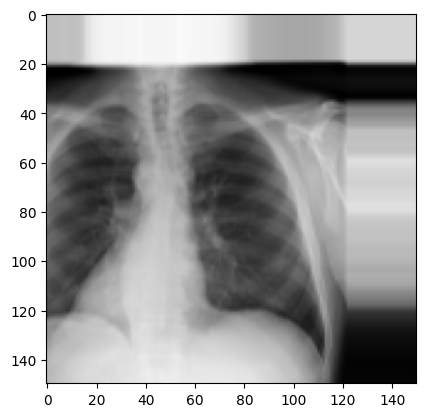

In [3]:
i = int(input())
plt.imshow(train_datagen[0][0][i])
print(class_names[int(train_datagen[0][1][i])])

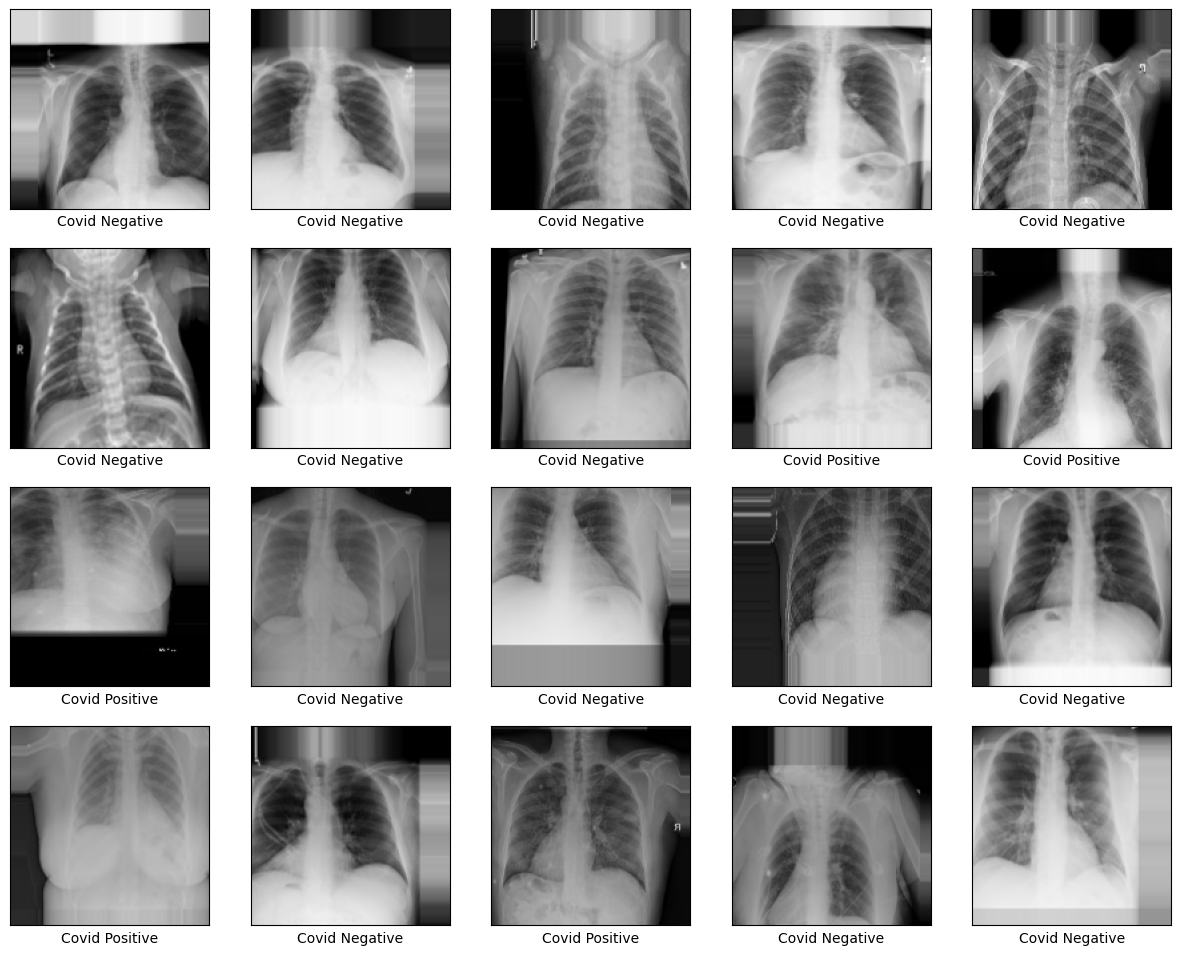

In [4]:
plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_datagen[0][0][i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(train_datagen[0][1][i])])
plt.show()

In [5]:
import tensorflow as tf
tf.random.set_seed(42)

model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape= (150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',input_shape= (150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu',input_shape= (150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

2024-01-05 11:53:44.362777: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-05 11:53:44.574390: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-05 11:53:44.575265: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-05 11:53:44.578760: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-05 11:53:44.579132: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 32)        0

In [6]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [7]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics = ['accuracy','Precision','Recall',])

In [17]:
history = model.fit(train_datagen,validation_data=val_datagen,epochs = 5)

Epoch 1/5
633/633 [==============================] - 103s 162ms/step - loss: 0.1505 - accuracy: 0.9420 - precision: 0.9120 - recall: 0.8868 - val_loss: 0.1544 - val_accuracy: 0.9393 - val_precision: 0.9177 - val_recall: 0.8700
Epoch 2/5
633/633 [==============================] - 87s 138ms/step - loss: 0.1492 - accuracy: 0.9411 - precision: 0.9094 - recall: 0.8865 - val_loss: 0.1578 - val_accuracy: 0.9440 - val_precision: 0.9063 - val_recall: 0.9014
Epoch 3/5
633/633 [==============================] - 89s 141ms/step - loss: 0.1408 - accuracy: 0.9447 - precision: 0.9147 - recall: 0.8941 - val_loss: 0.1696 - val_accuracy: 0.9374 - val_precision: 0.8945 - val_recall: 0.8906
Epoch 4/5
633/633 [==============================] - 94s 148ms/step - loss: 0.1469 - accuracy: 0.9426 - precision: 0.9095 - recall: 0.8922 - val_loss: 0.1328 - val_accuracy: 0.9497 - val_precision: 0.9189 - val_recall: 0.9079
Epoch 5/5
633/633 [==============================] - 96s 152ms/step - loss: 0.1370 - accuracy: 

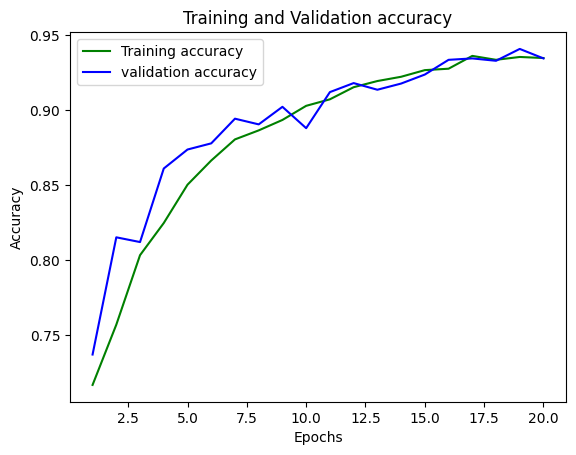

In [9]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, accuracy_train, 'g', label='Training accuracy')
plt.plot(epochs, accuracy_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

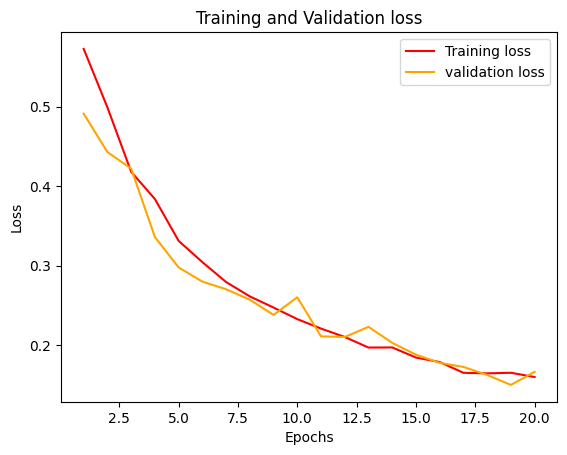

In [10]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'orange', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

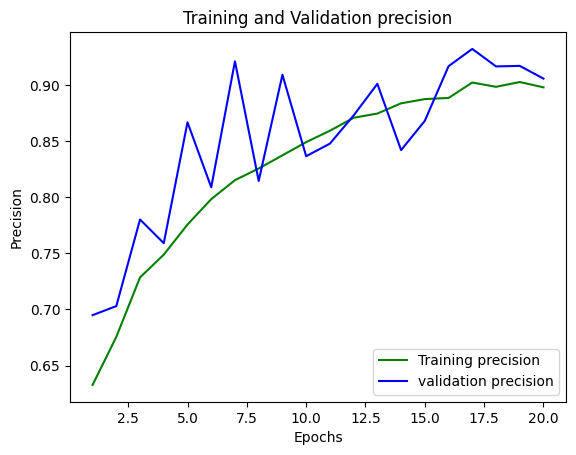

In [11]:
precision= history.history['precision']
val_precision = history.history['val_precision']
epochs = range(1,21)
plt.plot(epochs, precision, 'g', label='Training precision')
plt.plot(epochs, val_precision, 'b', label='validation precision')
plt.title('Training and Validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

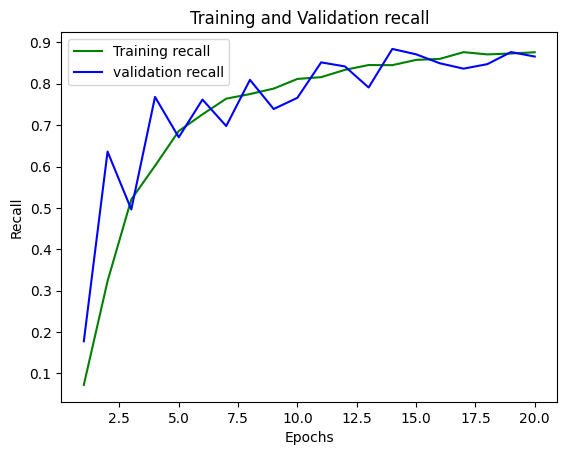

In [12]:
recall = history.history['recall']
val_recall = history.history['val_recall']
epochs = range(1,21)
plt.plot(epochs, recall, 'g', label='Training recall')
plt.plot(epochs, val_recall, 'b', label='validation recall')
plt.title('Training and Validation recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [13]:
test_generator = generator.flow_from_directory("./COVID/test",target_size=(150,150),class_mode='binary',batch_size=20, seed=42)

predictions=model.predict_generator(test_generator)
#pred
model.evaluate(test_generator)

Found 328 images belonging to 2 classes.


/tmp/ipykernel_27964/3389498609.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions=model.predict_generator(test_generator)


17/17 [==============================] - 4s 215ms/step - loss: 0.3445 - accuracy: 0.8902 - precision: 0.9776 - recall: 0.7988


[0.3445078134536743,
 0.8902438879013062,
 0.9776119589805603,
 0.7987805008888245]

In [16]:
model.save('my_model1.h5')